# Chapter 14 Markov Chains Monte Carlo Methods (MCMC)

In [11]:
import warnings
warnings.filterwarnings("ignore")


### Markov Chains

In [9]:
!pip install networkx

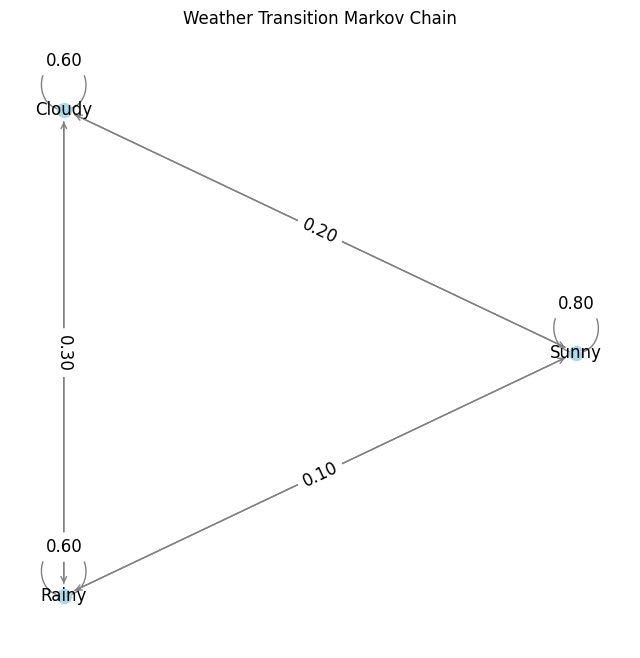

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

# Define weather states and transition probabilities
# States: Sunny, Cloudy, Rainy
transitions = {
    ('Sunny', 'Sunny'): 0.8, ('Sunny', 'Cloudy'): 0.15, ('Sunny', 'Rainy'): 0.05,
    ('Cloudy', 'Sunny'): 0.2, ('Cloudy', 'Cloudy'): 0.6,  ('Cloudy', 'Rainy'): 0.2,
    ('Rainy', 'Sunny'): 0.1, ('Rainy', 'Cloudy'): 0.3,  ('Rainy', 'Rainy'): 0.6
}

# Create a directed graph
G = nx.DiGraph()

# Add edges with weights and labels
for (start, end), prob in transitions.items():
    G.add_edge(start, end, weight=prob, label=f"{prob:.2f}")

# Choose a layout for visualization (circular layout works well for a small graph)
pos = nx.circular_layout(G)

# Draw nodes and edges
plt.figure(figsize=(8, 8))
nx.draw_networkx_nodes(G, pos, node_size=100, node_color="lightblue")
nx.draw_networkx_edges(G, pos, arrowstyle='->',  edge_color="gray")
nx.draw_networkx_labels(G, pos, font_size=12)

# Draw edge labels (transition probabilities)
edge_labels = {(u, v): d['label'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

plt.title("Weather Transition Markov Chain")
plt.axis('off')  
plt.show()

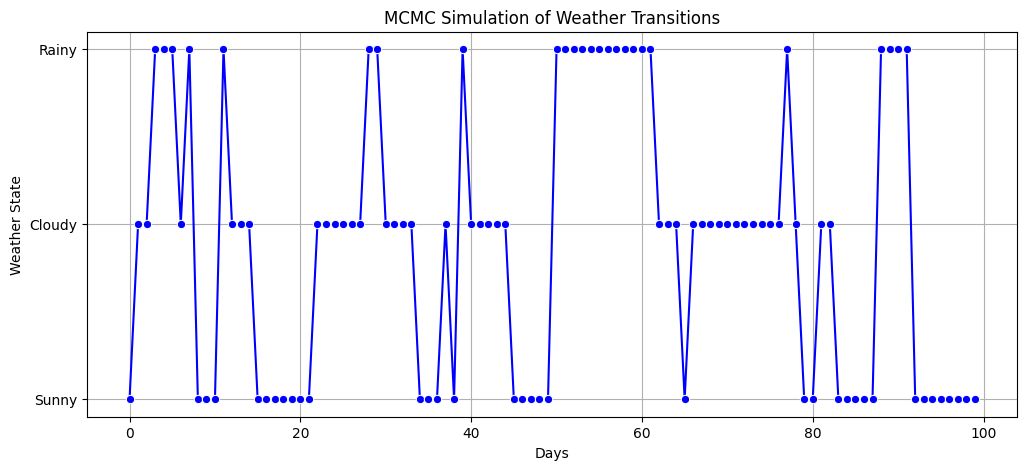

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Define states and transition probabilities
states = ['Sunny', 'Cloudy', 'Rainy']
transitions = {
    ('Sunny', 'Sunny'): 0.8,  ('Sunny', 'Cloudy'): 0.15, ('Sunny', 'Rainy'): 0.05,
    ('Cloudy', 'Sunny'): 0.2, ('Cloudy', 'Cloudy'): 0.6, ('Cloudy', 'Rainy'): 0.2,
    ('Rainy', 'Sunny'): 0.1, ('Rainy', 'Cloudy'): 0.3, ('Rainy', 'Rainy'): 0.6
}

# Create transition matrix
transition_matrix = np.array([
    [transitions[('Sunny', 'Sunny')], transitions[('Sunny', 'Cloudy')], transitions[('Sunny', 'Rainy')]],
    [transitions[('Cloudy', 'Sunny')], transitions[('Cloudy', 'Cloudy')], transitions[('Cloudy', 'Rainy')]],
    [transitions[('Rainy', 'Sunny')], transitions[('Rainy', 'Cloudy')], transitions[('Rainy', 'Rainy')]]
])

# Mapping of states to indices
state_index = {state: i for i, state in enumerate(states)}

# MCMC simulation
def mcmc_weather_simulation(start_state, num_days):
    current_state = start_state
    history = [current_state]
    
    for _ in range(num_days - 1):
        next_state = np.random.choice(states, p=transition_matrix[state_index[current_state]])
        history.append(next_state)
        current_state = next_state
    
    return history

# Simulate for 100 days starting from 'Sunny'
simulated_weather = mcmc_weather_simulation('Sunny', 100)

# Convert to numerical values for visualization
weather_numerical = [state_index[state] for state in simulated_weather]

time_steps = np.arange(len(simulated_weather))

# Plot results
plt.figure(figsize=(12, 5))
sns.lineplot(x=time_steps, y=weather_numerical, marker="o", linestyle="-", color="b")
plt.yticks(ticks=[0, 1, 2], labels=states)
plt.xlabel("Days")
plt.ylabel("Weather State")
plt.title("MCMC Simulation of Weather Transitions")
plt.grid()
plt.show()


## Basic Properties about Stock returns

In [3]:
#!pip install yfinance

In [4]:
import yfinance as yf
orig = yf.download(["AAPL"], start="2020-01-01", end="2024-12-31")
orig = orig[('Close')]
orig.tail()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Ticker,AAPL
Date,
2024-12-23,254.655716
2024-12-24,257.578674
2024-12-26,258.396667
2024-12-27,254.974930
2024-12-30,251.593079


<Axes: xlabel='Date'>

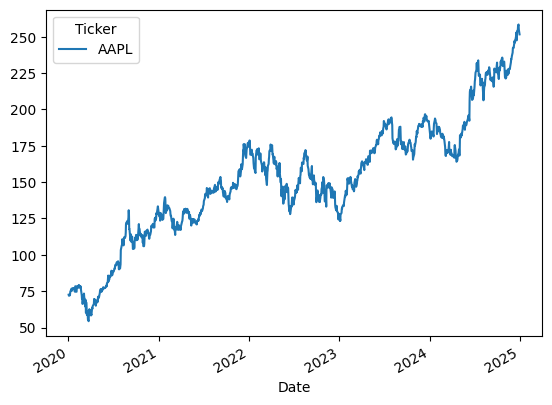

In [5]:
orig.plot()

array([[<Axes: title={'center': 'AAPL'}>]], dtype=object)

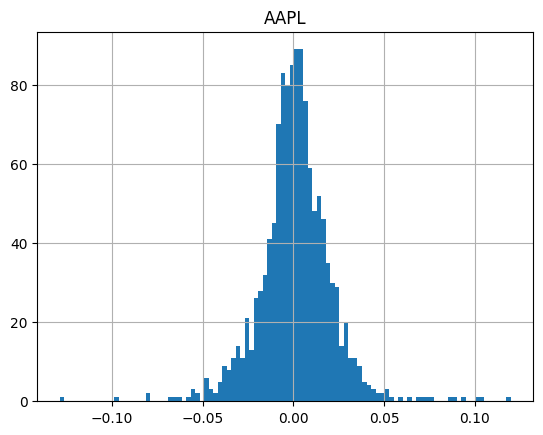

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
returns = orig.pct_change()
returns.hist(bins=100)

In [7]:
print('The mean of daily returns is:', returns.mean())
print('The standard deviation of daily returns is:', returns.std())

The mean of daily returns is: Ticker
AAPL    0.001189
dtype: float64
The standard deviation of daily returns is: Ticker
AAPL    0.019962
dtype: float64


## The Gibbs Sampling

### Example 1

In [8]:
sigma = returns.std() # Sigma is the standard deviation
sigma

Ticker
AAPL    0.019962
dtype: float64

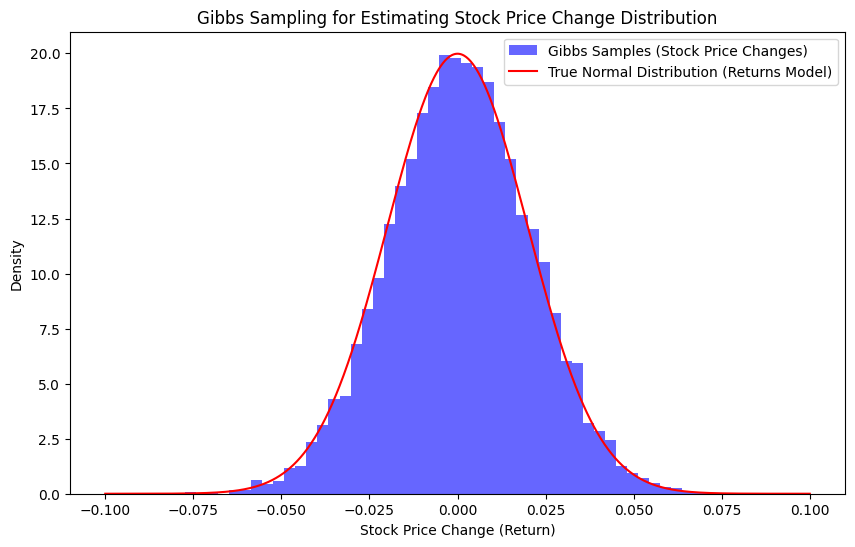

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate some historical stock returns (e.g., daily returns)
np.random.seed(42)
historical_returns = np.random.normal(loc=0.001, scale=0.02, size=1000)  # Mean return 0.1%, Std 2%
sigma = 0.019962
# Gibbs Sampling function for stock returns
def gibbs_sampling_stock(num_samples, mu=0.001, sigma=0.02):
    samples = np.zeros(num_samples)
    x = historical_returns[0]  # Initial stock return
    
    for i in range(num_samples):
        # Sample the next return from a normal distribution conditioned on the previous sample
        x = np.random.normal(mu, sigma)  # Gibbs step: Direct sampling from conditional distribution
        samples[i] = x
    
    return samples

# Generate 10,000 samples using Gibbs Sampling
num_samples = 10000
samples_stock = gibbs_sampling_stock(num_samples)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.hist(samples_stock, bins=50, density=True, alpha=0.6, color='blue', label="Gibbs Samples (Stock Price Changes)")
x_vals = np.linspace(-0.1, 0.1, 1000)  # Stock price change range
plt.plot(x_vals, (1/(np.sqrt(2 * np.pi * sigma**2))) * np.exp(-x_vals**2 / (2 * sigma**2)),
         color='red', label="True Normal Distribution (Returns Model)")
plt.xlabel("Stock Price Change (Return)")
plt.ylabel("Density")
plt.title("Gibbs Sampling for Estimating Stock Price Change Distribution")
plt.legend()
plt.show()


### Example 2

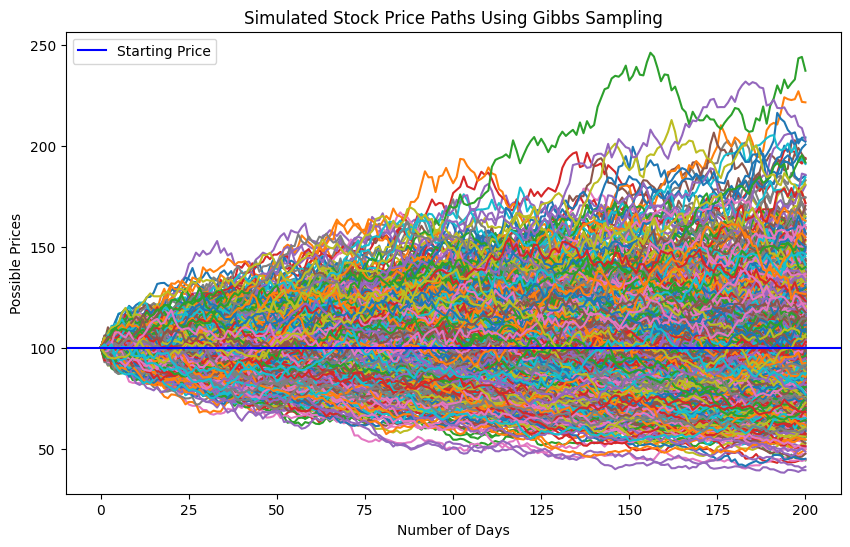

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import warnings

#warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# Parameters for the simulation
num_simulations = 1000
num_days = 200
daily_volatility = 0.02  # Example volatility (daily)
last_price = 100  # Initial stock price
mu = 0  # Mean of stock returns
sigma = daily_volatility  # Standard deviation of stock returns

# Gibbs Sampling function for generating price paths
def gibbs_sampling_stock_price(num_simulations, num_days, initial_price, mu, sigma):
    simulation_df = pd.DataFrame()
    
    for x in range(num_simulations):
        # Start the price series with the initial price
        price_series = [initial_price]
        
        # Gibbs sampling for stock price path generation
        for g in range(num_days):
            # Sample return using a normal distribution with mean 'mu' and std 'sigma'
            rtn = np.random.normal(mu, sigma)
            
            # Calculate the price based on the return and the previous price
            price = price_series[g] * (1 + rtn)
            price_series.append(price)
        
        # Store the simulated price path for this simulation
        simulation_df[x] = price_series
    
    return simulation_df

# Simulate price paths using Gibbs sampling
simulation_df = gibbs_sampling_stock_price(num_simulations, num_days, last_price, mu, sigma)

# Visualization of multiple price paths
fig = plt.figure(figsize=(10, 6))
plt.plot(simulation_df)
plt.xlabel('Number of Days')
plt.ylabel('Possible Prices')
plt.axhline(y=last_price, color='b', linestyle='-', label='Starting Price')
plt.title('Simulated Stock Price Paths Using Gibbs Sampling')
plt.legend()
plt.show()


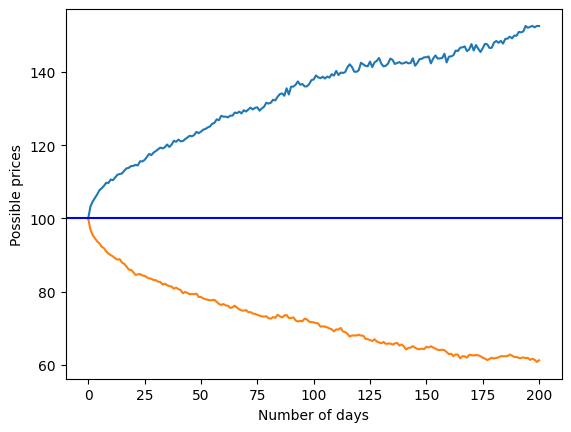

In [13]:
upper = simulation_df.quantile(.95, axis=1)
lower = simulation_df.quantile(.05, axis=1)
stock_range = pd.concat([upper, lower], axis=1)

fig = plt.figure()
plt.plot(stock_range)
plt.xlabel('Number of days')
plt.ylabel('Possible prices')
plt.axhline(y = last_price, color = 'b', linestyle = '-')
plt.show()

### Example 3

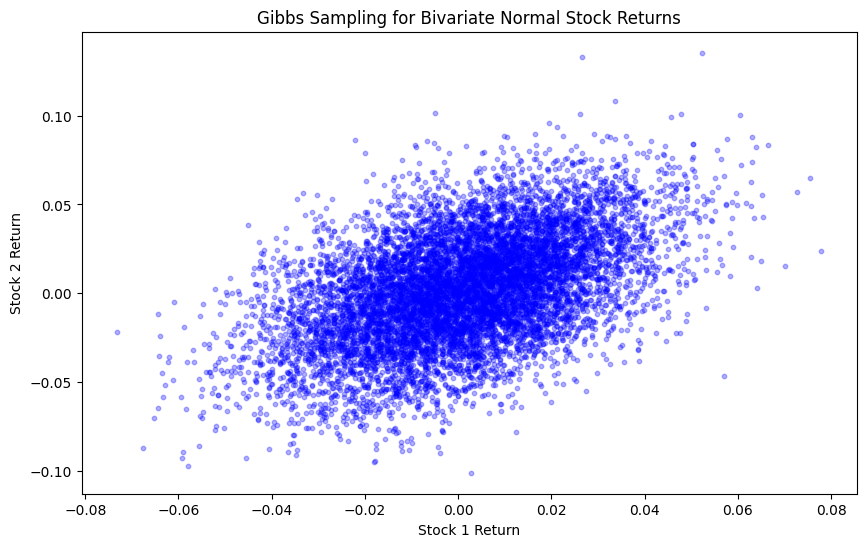

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the bivariate normal target distribution
mu1 = 0.001         # Mean return for Stock 1
mu2 = 0.002         # Mean return for Stock 2
sigma1 = 0.02       # Standard deviation for Stock 1
sigma2 = 0.03       # Standard deviation for Stock 2
rho = 0.5           # Correlation coefficient between the two stocks

num_samples = 10000  # Number of Gibbs samples to generate

def gibbs_sampling_bivariate(num_samples, mu1, mu2, sigma1, sigma2, rho):
    samples = np.zeros((num_samples, 2))
    
    # Initialize x and y (returns for Stock 1 and Stock 2)
    x = 0.0
    y = 0.0
    samples[0, :] = [x, y]
    
    for i in range(1, num_samples):
        # Sample x given y.
        # Conditional distribution: x | y ~ Normal(mu1 + rho * (sigma1/sigma2) * (y - mu2), sigma1^2 * (1 - rho^2))
        mu_x_given_y = mu1 + rho * (sigma1 / sigma2) * (y - mu2)
        sigma_x_given_y = sigma1 * np.sqrt(1 - rho**2)
        x = np.random.normal(mu_x_given_y, sigma_x_given_y)
        
        # Sample y given x.
        # Conditional distribution: y | x ~ Normal(mu2 + rho * (sigma2/sigma1) * (x - mu1), sigma2^2 * (1 - rho^2))
        mu_y_given_x = mu2 + rho * (sigma2 / sigma1) * (x - mu1)
        sigma_y_given_x = sigma2 * np.sqrt(1 - rho**2)
        y = np.random.normal(mu_y_given_x, sigma_y_given_x)
        
        samples[i, :] = [x, y]
    
    return samples

# Generate samples using Gibbs sampling
samples = gibbs_sampling_bivariate(num_samples, mu1, mu2, sigma1, sigma2, rho)

# Visualize the results with a scatter plot of the two stock returns
plt.figure(figsize=(10, 6))
plt.scatter(samples[:, 0], samples[:, 1], alpha=0.3, s=10, color='blue')
plt.xlabel('Stock 1 Return')
plt.ylabel('Stock 2 Return')
plt.title('Gibbs Sampling for Bivariate Normal Stock Returns')
plt.show()

## Metropolis Hastings

### Example 1

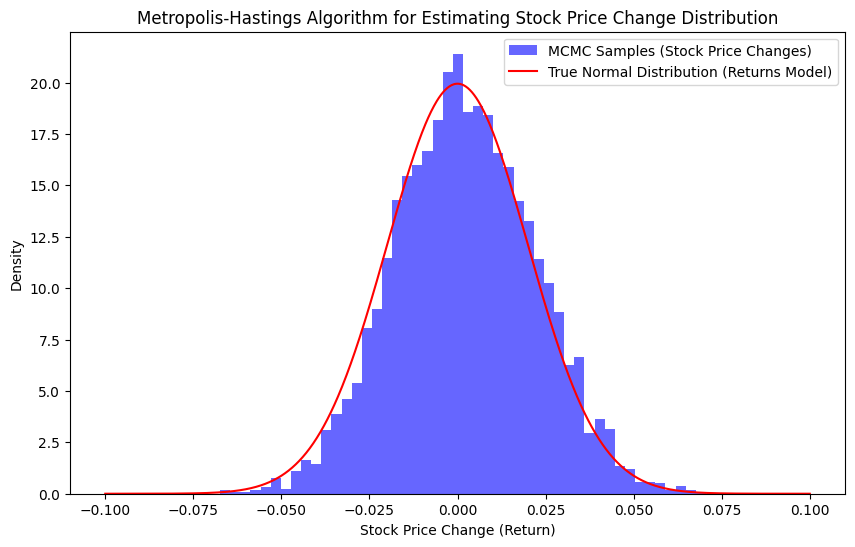

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Simulate some historical stock returns (e.g., daily returns)
np.random.seed(42)
historical_returns = np.random.normal(loc=0.001, scale=0.02, size=1000)  # Mean return 0.1%, Std 2%

# Define the target distribution (based on historical returns)
def target_distribution_stock(x, mu=0.001, sigma=0.02):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)  # Gaussian distribution for returns

# Metropolis-Hastings function
def metropolis_hastings_stock(num_samples, proposal_std):
    samples = []
    x = historical_returns[0]  # Start at the first historical return as the initial price change
    for i in range(num_samples):
        # Propose a new sample based on the current sample (stock price change)
        x_proposal = np.random.normal(x, proposal_std)
        
        # Calculate the acceptance ratio based on the target distribution
        acceptance_ratio = target_distribution_stock(x_proposal) / target_distribution_stock(x)
        
        # Accept or reject the proposal
        if np.random.rand() < acceptance_ratio:
            x = x_proposal
        
        samples.append(x)
    
    return np.array(samples)

# Generate 10,000 samples using Metropolis-Hastings
num_samples = 10000
proposal_std = 0.02  # Standard deviation of the proposal distribution
samples_stock = metropolis_hastings_stock(num_samples, proposal_std)

# Visualize the results
plt.figure(figsize=(10, 6))
plt.hist(samples_stock, bins=50, density=True, alpha=0.6, color='blue', label="MCMC Samples (Stock Price Changes)")
x_vals = np.linspace(-0.1, 0.1, 1000)  # Stock price change range
plt.plot(x_vals, (1/(np.sqrt(2 * np.pi * proposal_std**2))) * np.exp(-x_vals**2 / (2 * proposal_std**2)),
         color='red', label="True Normal Distribution (Returns Model)")
plt.xlabel("Stock Price Change (Return)")
plt.ylabel("Density")
plt.title("Metropolis-Hastings Algorithm for Estimating Stock Price Change Distribution")
plt.legend()
plt.show()

### Example 2

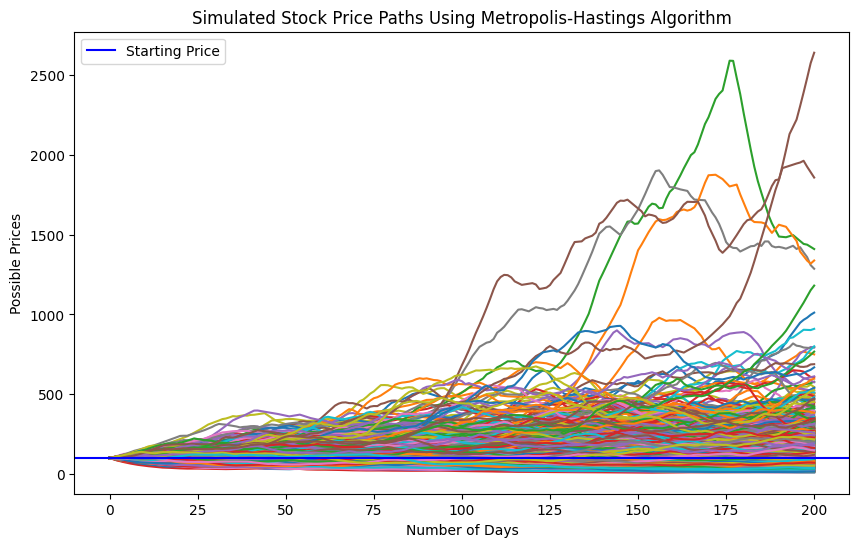

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.simplefilter(action='ignore', category=pd.errors.PerformanceWarning)

# Parameters for the simulation
num_simulations = 1000
num_days = 200
daily_volatility = 0.02  # Example volatility (daily)
last_price = 100  # Initial stock price

# Define the target distribution (based on historical returns)
def target_distribution_stock(x, mu=0.001, sigma=0.02):
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2)  # Gaussian distribution for returns

# Metropolis-Hastings function to simulate returns
def metropolis_hastings_stock(num_samples, proposal_std, initial_price):
    samples = []
    x = np.random.normal(0, proposal_std)  # Initial random return
    for i in range(num_samples):
        # Propose a new sample based on the current sample (stock price change)
        x_proposal = np.random.normal(x, proposal_std)
        
        # Calculate the acceptance ratio based on the target distribution
        acceptance_ratio = target_distribution_stock(x_proposal) / target_distribution_stock(x)
        
        # Accept or reject the proposal
        if np.random.rand() < acceptance_ratio:
            x = x_proposal
        
        samples.append(x)
    
    # Convert return samples to price path
    price_path = [initial_price]
    for rtn in samples:
        price_path.append(price_path[-1] * (1 + rtn))  # Update price based on return
    
    return np.array(price_path)

# Simulate price paths
simulation_df = pd.DataFrame()
for x in range(num_simulations):
    # Run Metropolis-Hastings to simulate stock price path
    price_path = metropolis_hastings_stock(num_samples=num_days, proposal_std=daily_volatility, initial_price=last_price)
    
    # Store the price path
    simulation_df[x] = price_path

# Visualization of multiple price paths
fig = plt.figure(figsize=(10, 6))
plt.plot(simulation_df)
plt.xlabel('Number of Days')
plt.ylabel('Possible Prices')
plt.axhline(y=last_price, color='b', linestyle='-', label='Starting Price')
plt.title('Simulated Stock Price Paths Using Metropolis-Hastings Algorithm')
plt.legend()
plt.show()
